### CH15 변수선택

In [1]:
options(repr.plot.width = 16, repr.plot.height = 9)

In [3]:
dt <- data.frame(

 x1 = c(7,1,11,11,7,11,3,1,2,21,1,11,10),
 x2 = c(26,29,56,31,52,55,71,31,54,47,40,66,68),
 x3 = c(6,15,8,8,6,9,17,22,18,4,23,9,8),
 x4 = c(60,52,20,47,33,22,6,44,22,26,34,12,12),
 y = c(78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4)
)
head(dt)

,x1,x2,x3,x4,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


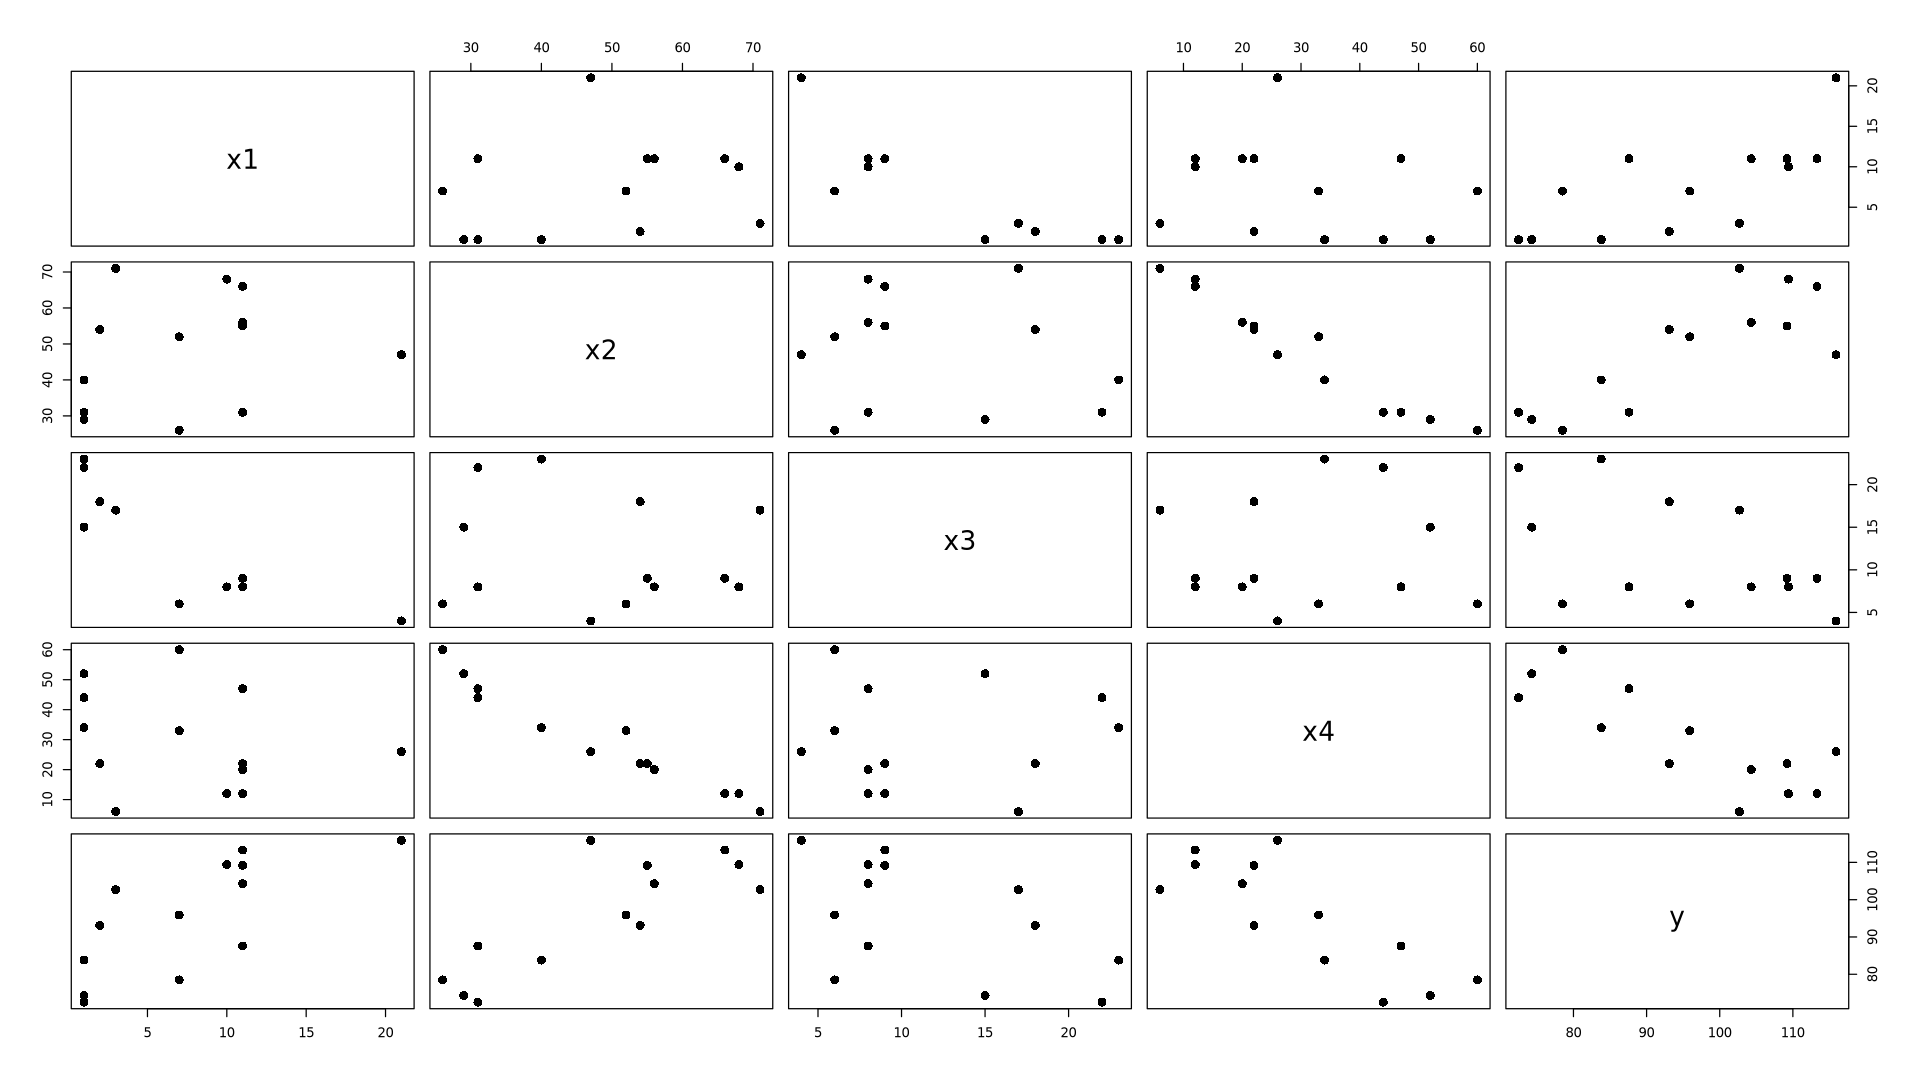

In [7]:
pairs(dt, pch = 16, cex = 1.5)

> $x_2$와 $x_4$간의 음의 선형 상관관계가 두드러진다. 그리고 두 설명변수는 $y$와의 선형 상관관계가 잘 나타난다.

In [8]:
cor(dt)

,x1,x2,x3,x4,y
x1,1.0000000,0.2285795,-0.8241338,-0.2454451,0.7307175
x2,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526
x3,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707
x4,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050
y,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000


> $x_3$은 상관계수의 절대값이 상대적으로 낮으므로 추가되지 않을 가능성이 높다. 하지만 절대적이지 않음. 추가되는 정보가 얼마나 많으냐에 따라 달라진다. (공선성도 고려해야 하고, 등등)

**FULL model**

In [9]:
m = lm(y~., dt)
summary(m)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


> 모형은 상당히 유의하고, $R^2$도 큰데, 개별 회귀계수는 유의하지 않다. 이는 다중공선성이 있기 때문이다.

* 후진제거법 : F 기준

In [11]:
summary(m)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


> $x_3$의 t-value의 절댓값이 가장 낮고($F_L$), 기각역에서 귀무가설 기각 불가능(대충 0.1이라고 하면)

In [12]:
drop1(m, test = "F")  ## 부분 F-test를 통해 하나를 뺄 것이라는 뜻

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47.86364,26.94429,NA,NA
x1,1,25.9509114,73.81455,30.57588,4.33747400,0.07082169
x2,1,2.9724782,50.83612,25.72755,0.49682444,0.50090110
x3,1,0.1090900,47.97273,24.97388,0.01823347,0.89592269
x4,1,0.2469747,48.11061,25.01120,0.04127972,0.84407147


> 각 설명변수를 뺐을 때의 부분 F-test 값이다. $x_3$의 F-value가 가장 낮다. AIC도 가장 낮다... $\to$ 없앤다.

1. $x_3$ 제거

In [14]:
m1 <- update(m, ~.-x3)
summary(m1)


Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


2. $x_4$ 제거

In [16]:
m2 <- update(m1, ~.-x4)
summary(m2)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


> 이제 t-value의 절댓값이 가장 낮은 설명변수가 $x_1$인데, 이는 통계적으로 유의하기 때문에 제거할 수 없음. 따라서 최종 모형은 $\hat y = f(x_1, x_2)$

* 전진선택법

In [21]:
m0 = lm(y~1, data = dt)
add1(m0,
   scope = y~x1+x2+x3+x4,
   test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2715.7631,71.44443,NA,NA
x1,1,1450.0763,1265.6867,63.51947,12.602518,0.0045520446
x2,1,1809.4267,906.3363,59.17799,21.960605,0.0006648249
x3,1,776.3626,1939.4005,69.06740,4.403417,0.0597623242
x4,1,1831.8962,883.8669,58.85164,22.798520,0.0005762318


> $x_4$의 F-value가 가장 크고, 유의함. 따라서 추가하면

In [22]:
m1 = update(m0, ~. + x4)
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,	Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762


> 유의하게 잘 나옴

In [23]:
add1(m1,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,883.86692,58.85164,NA,NA
x1,1,809.10480,74.76211,28.74170,108.2239093,1.105281e-06
x2,1,14.98679,868.88013,60.62933,0.1724839,6.866842e-01
x3,1,708.12891,175.73800,39.85258,40.2945802,8.375467e-05


> 다음으론 $x_1$의 F-value가 가장 높고 유의함.

In [26]:
m2 = update(m1, ~.+x1)
summary(m2)


Call:
lm(formula = y ~ x4 + x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0234 -1.4737  0.1371  1.7305  3.7701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.09738    2.12398   48.54 3.32e-13 ***
x4           -0.61395    0.04864  -12.62 1.81e-07 ***
x1            1.43996    0.13842   10.40 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.734 on 10 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.967 
F-statistic: 176.6 on 2 and 10 DF,  p-value: 1.581e-08


> $x_1$을 추가한 모형도 유의함.

In [27]:
add1(m2,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,74.76211,28.74170,NA,NA
x2,1,26.78938,47.97273,24.97388,5.025865,0.05168735
x3,1,23.92599,50.83612,25.72755,4.235846,0.06969226


> 다음으론 $x_2$를 추가할 수 있겠음. 그런데 $\alpha = 0.05$에서 $x_2$는 유의하지 않으므로 추가하지 않을 것이고 최종 모형은 $\hat y = f(x_1, x_4)$

* 단계적 선택법

In [30]:
m0 = lm(y~1, data = dt)  ## null_model
add1(m0,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2715.7631,71.44443,NA,NA
x1,1,1450.0763,1265.6867,63.51947,12.602518,0.0045520446
x2,1,1809.4267,906.3363,59.17799,21.960605,0.0006648249
x3,1,776.3626,1939.4005,69.06740,4.403417,0.0597623242
x4,1,1831.8962,883.8669,58.85164,22.798520,0.0005762318


In [31]:
m1 = update(m0, ~.+x4)  ## 전진선택법과 동일
summary(m1)


Call:
lm(formula = y ~ x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.589  -8.228   1.495   4.726  17.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 117.5679     5.2622  22.342 1.62e-10 ***
x4           -0.7382     0.1546  -4.775 0.000576 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 11 degrees of freedom
Multiple R-squared:  0.6745,	Adjusted R-squared:  0.645 
F-statistic:  22.8 on 1 and 11 DF,  p-value: 0.0005762


In [32]:
add1(m1,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,883.86692,58.85164,NA,NA
x1,1,809.10480,74.76211,28.74170,108.2239093,1.105281e-06
x2,1,14.98679,868.88013,60.62933,0.1724839,6.866842e-01
x3,1,708.12891,175.73800,39.85258,40.2945802,8.375467e-05


> $x_1$을 추가함

In [33]:
m2 = update(m1, ~.+x1)
summary(m2)  ## 제거 없음


Call:
lm(formula = y ~ x4 + x1, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0234 -1.4737  0.1371  1.7305  3.7701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.09738    2.12398   48.54 3.32e-13 ***
x4           -0.61395    0.04864  -12.62 1.81e-07 ***
x1            1.43996    0.13842   10.40 1.11e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.734 on 10 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.967 
F-statistic: 176.6 on 2 and 10 DF,  p-value: 1.581e-08


> $x_4$에 대한 부분 F-test 결과 제거하지 않음.

In [34]:
add1(m2,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,74.76211,28.74170,NA,NA
x2,1,26.78938,47.97273,24.97388,5.025865,0.05168735
x3,1,23.92599,50.83612,25.72755,4.235846,0.06969226


> $x_2$를 추가할 수 있음. (유의수준을 여유롭게 0.1로 하면)

In [35]:
m3 = update(m2, ~.+x2)
summary(m3)


Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


> $x_4$가 유의하지 않아짐. 따라서 제거.

In [36]:
m4 = update(m3, ~.-x4)
add1(m4,
    scope = y~x1+x2+x3+x4,
    test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,57.90448,25.41999,NA,NA
x3,1,9.793869,48.11061,25.01120,1.832128,0.2088895
x4,1,9.931754,47.97273,24.97388,1.863262,0.2053954


> 유의수준 $\alpha = 0.1$에서 추가할 수 있는 설명변수는 없음. 따라서 최종 모형은 $\hat y = f(x_1, x_2)$

In [39]:
install.packages("leaps")
library(leaps)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [46]:
fit = regsubsets(y~., data = dt, nbest = 1, nvmax = 4,
                method = "forward")
## method = c("exhaustive", "backward", "forward", "seqrep")

In [47]:
a = summary(fit)
a

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 1, nvmax = 4, method = "forward")
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: forward
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
2  ( 1 ) "*" " " " " "*"
3  ( 1 ) "*" "*" " " "*"
4  ( 1 ) "*" "*" "*" "*"

> `nbest = 1` : 설명변수를 썼을 때 좋은 변수를 하나씩 보여달라.

전진선택법에서 하나를 썼을 때는 $x_4$가, 2개를 썼을 때는 $x_1, x_4$가 ... 가장 좋았다.

In [48]:
str(a)

List of 8
 $ which : logi [1:4, 1:5] TRUE TRUE TRUE TRUE FALSE TRUE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:5] "(Intercept)" "x1" "x2" "x3" ...
 $ rsq   : num [1:4] 0.675 0.972 0.982 0.982
 $ rss   : num [1:4] 883.9 74.8 48 47.9
 $ adjr2 : num [1:4] 0.645 0.967 0.976 0.974
 $ cp    : num [1:4] 138.73 5.5 3.02 5
 $ bic   : num [1:4] -9.46 -39.01 -42.21 -39.68
 $ outmat: chr [1:4, 1:4] " " "*" "*" "*" ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1  ( 1 )" "2  ( 1 )" "3  ( 1 )" "4  ( 1 )"
  .. ..$ : chr [1:4] "x1" "x2" "x3" "x4"
 $ obj   :List of 28
  ..$ np       : int 5
  ..$ nrbar    : int 10
  ..$ d        : num [1:5] 13 3362 390.2 154.7 10.5
  ..$ rbar     : num [1:10] 30 7.4615 48.1538 11.7692 -0.0863 ...
  ..$ thetab   : num [1:5] 95.423 -0.738 1.44 0.416 0.102
  ..$ first    : int 2
  ..$ last     : int 5
  ..$ vorder   : int [1:5] 1 5 2 3 4
  ..$ tol      : num [1:5] 1.80e-09 9.67e-08 2.36e-08 1.19e-07 3.72e-

> $R^2_{adj}$를 기준으로 하면 설명변수 3개를 택한 것이 가장 큼
>
> cp 기준으로 하면 설명변수 3개를 택한 것이 유일하게 p+1보다 작음.
>
> bic를 기준으로 하면 3개를 택한 것이 -42.21로 가장 작음.

In [49]:
with(summary(fit),
    round(cbind(which, rss, rsq, adjr2, cp, bic), 3))

,(Intercept),x1,x2,x3,x4,rss,rsq,adjr2,cp,bic
1,1,0,0,0,1,883.867,0.675,0.645,138.731,-9.463
2,1,1,0,0,1,74.762,0.972,0.967,5.496,-39.008
3,1,1,1,0,1,47.973,0.982,0.976,3.018,-42.211
4,1,1,1,1,1,47.864,0.982,0.974,5.000,-39.675


Backward(후진제거법) - AIC 기준

In [50]:
model_back = step(m, direction = "backward")  ## 개별 스텝을 보여줌
summary(model_back)

Start:  AIC=26.94
y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = y ~ x1 + x2 + x4, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


> 두번째 스텝에서 설명변수를 제거했을 때 AIC가 전부 커졌으므로 멈춤. 최적의 모델로 택함.

Forward(전진선택법) - AIC기준

In [51]:
model_forward = step(m0, scope = y~x1+x2+x3+x4, direction = "forward")
summary(model_forward)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944



Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


> 마지막 $x_3$를 추가할 때 AIC가 커졌으므로, 최종 모형은 3개를 선택한 모형.

전진선택법과 후진제거법을 동시에 활용하는 단계적 선택법

In [52]:
model_step = step(m0, scope = y~x1+x2+x3+x4,
                 direction = "both")
summary(model_step)

Start:  AIC=71.44
y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = y ~ x4 + x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x4           -0.2365     0.1733  -1.365 0.205395    
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


> $x_1$을 추가했을 때 $x_4$를 빼면 AIC 증가. $\to$ 안뺌
>
> $x_2$를 추가했을 때 아무것도 하지 않는 게 AIC가 가장 낮음. $\to$ 안뺌

In [53]:
m_full = lm(y~., dt)
summary(m_full)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


뭔가 반복하는 모형(별로 안중요하대요.)

In [54]:
fit = regsubsets(y~., data = dt, nbest = 1, method = "seqrep")
summary(fit)

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt, nbest = 1, method = "seqrep")
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: 'sequential replacement'
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
2  ( 1 ) "*" "*" " " " "
3  ( 1 ) "*" "*" "*" " "
4  ( 1 ) "*" "*" "*" "*"

In [55]:
with(summary(fit),
 round(cbind(which,rss,rsq,adjr2, cp, bic),3))

,(Intercept),x1,x2,x3,x4,rss,rsq,adjr2,cp,bic
1,1,0,0,0,1,883.867,0.675,0.645,138.731,-9.463
2,1,1,1,0,0,57.904,0.979,0.974,2.678,-42.330
3,1,1,1,1,0,48.111,0.982,0.976,3.041,-42.173
4,1,1,1,1,1,47.864,0.982,0.974,5.000,-39.675


> 이거는 $x_1$, $x_2$를 택한 게 BIC가 가장 낮았네.

`-` mtcars data

In [56]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [57]:
round(cor(mtcars), 2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [60]:
m_full = lm(mpg~.,mtcars)
summary(m_full)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

> 모형은 유의하나, 개별 회귀계수가 유의하지 않음. 다중공선성 우려되어 변수 선택이 필요.

In [67]:
fit = regsubsets(mpg~., data = mtcars, nbest = 1, nvmax = 4,  ## 설명변수 최대 4개 선택
                method = "exhaustive", really.big = T)  ## 모든 가능한 회귀
summary(fit)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nbest = 1, nvmax = 4, 
    method = "exhaustive", really.big = T)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 ) " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 ) "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 ) " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 ) " " " "  "*" " "  "*" "*"  " " "*" " "  " " 

In [68]:
with(summary(fit),
 round(cbind(which,rss,rsq,adjr2, cp, bic),3))

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,1,0,0,0,0,0,278.322,0.753,0.745,11.627,-37.795
2,1,1,0,0,0,1,0,0,0,0,0,191.172,0.830,0.819,1.219,-46.348
3,1,0,0,0,0,1,1,0,1,0,0,169.286,0.850,0.834,0.103,-46.773
4,1,0,0,1,0,1,1,0,1,0,0,160.066,0.858,0.837,0.790,-45.099


> $R_{adj}^2$ 기준으로는 4개 선택한거, cp는 2개 선택한 것, bic기준으로는 3개 선택한 것

In [69]:
fit_4 = lm(mpg~hp+wt+qsec+am, mtcars)
summary(fit_4)


Call:
lm(formula = mpg ~ hp + wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4975 -1.5902 -0.1122  1.1795  4.5404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.44019    9.31887   1.871  0.07215 . 
hp          -0.01765    0.01415  -1.247  0.22309   
wt          -3.23810    0.88990  -3.639  0.00114 **
qsec         0.81060    0.43887   1.847  0.07573 . 
am           2.92550    1.39715   2.094  0.04579 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.435 on 27 degrees of freedom
Multiple R-squared:  0.8579,	Adjusted R-squared:  0.8368 
F-statistic: 40.74 on 4 and 27 DF,  p-value: 4.589e-11


In [71]:
fit_bic = lm(mpg~wt+qsec+am, mtcars)
summary(fit_bic)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


> 더 유의하게 나오긴 했음. 어떤 것을 선택할지는 정답이 정해져있는 게 아니다.